### __Project 4: Capital Project Investment Analysis__

__Scenario:__

You're tasked with evaluating the financial feasibility of investing in a capital project for infrastructure upgrades in the telecommunications business. You have data on project costs, expected benefits, and want to assess the impact on the business's overall financial health.

__Tasks:__

*   Load the data containing information about project costs and expected benefits for a capital project, for a three-year period.
*   Calculate net cash flow and cumulative cash flow over the years.
*   Visualize net cash flow and cumulative cash flow over the years.
*   Print the net cash flow and cumulative cash flow for the last year.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the pricing_data.csv
capital_project_data_realistic = pd.read_csv("capital_project_data_realistic.csv")

capital_project_data_realistic.head()

,Year,hardware_costs,software_costs,labor_costs_project,efficiency_improvements
0,2022,137454.011885,79932.924210,84065.852852,2.120494e+07
1,2023,195071.430641,57800.932022,140632.330204,1.226760e+07
2,2024,173199.394181,57799.726017,122078.050822,2.460883e+07


In [4]:
# Calculate total project costs
capital_project_data_realistic['project_costs_realistic'] = capital_project_data_realistic['hardware_costs'] + capital_project_data_realistic['software_costs'] + capital_project_data_realistic['labor_costs_project']

# Calculate expected benefits
capital_project_data_realistic['expected_benefits_realistic'] = capital_project_data_realistic['efficiency_improvements']

capital_project_data_realistic.head()

,Year,hardware_costs,software_costs,labor_costs_project,efficiency_improvements,project_costs_realistic,expected_benefits_realistic
0,2022,137454.011885,79932.924210,84065.852852,2.120494e+07,301452.788946,2.120494e+07
1,2023,195071.430641,57800.932022,140632.330204,1.226760e+07,393504.692867,1.226760e+07
2,2024,173199.394181,57799.726017,122078.050822,2.460883e+07,353077.171020,2.460883e+07


In [5]:
# Calculate net cash flow and cumulative cash flow
capital_project_data_realistic['Net_Cash_Flow'] = capital_project_data_realistic['expected_benefits_realistic'] - capital_project_data_realistic['project_costs_realistic']
capital_project_data_realistic['Cumulative_Cash_Flow'] = capital_project_data_realistic['Net_Cash_Flow'].cumsum()

capital_project_data_realistic.head()

,Year,hardware_costs,software_costs,labor_costs_project,efficiency_improvements,project_costs_realistic,expected_benefits_realistic,Net_Cash_Flow,Cumulative_Cash_Flow
0,2022,137454.011885,79932.924210,84065.852852,2.120494e+07,301452.788946,2.120494e+07,2.090349e+07,2.090349e+07
1,2023,195071.430641,57800.932022,140632.330204,1.226760e+07,393504.692867,1.226760e+07,1.187409e+07,3.277758e+07
2,2024,173199.394181,57799.726017,122078.050822,2.460883e+07,353077.171020,2.460883e+07,2.425575e+07,5.703334e+07


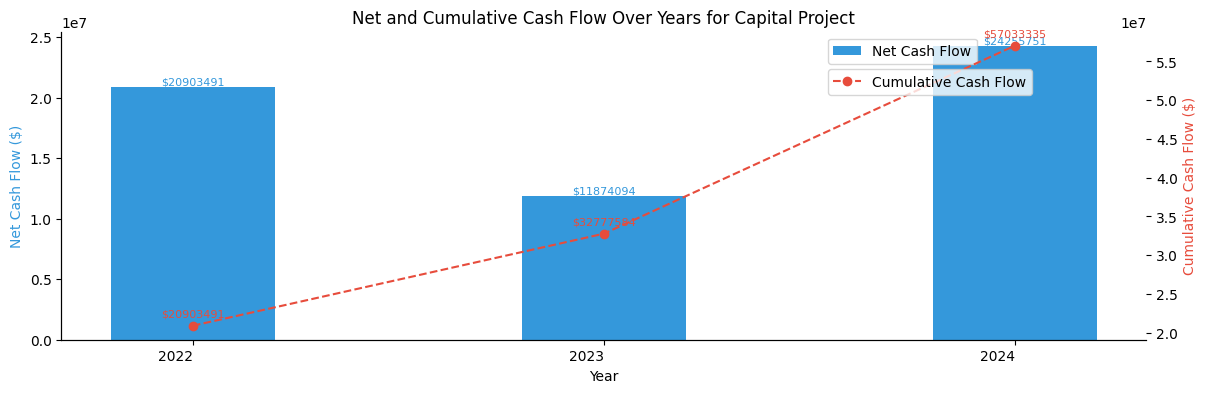

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming capital_project_data_realistic has columns 'Year', 'Net_Cash_Flow', and 'Cumulative_Cash_Flow' (replace with your actual column names)

# Set a professional color palette
colors = ['#3498db', '#e74c3c']  # Blue and Red, you can adjust these colors based on your preference

# Create a figure with a dual Y-axis
fig, ax1 = plt.subplots(figsize=(14, 4))

# Bar plot for Net Cash Flow
bar_width = 0.4
ax1.bar(capital_project_data_realistic['Year'], capital_project_data_realistic['Net_Cash_Flow'], label='Net Cash Flow', color=colors[0], width=bar_width)

# Create a second Y-axis for Cumulative Cash Flow
ax2 = ax1.twinx()
ax2.plot(capital_project_data_realistic['Year'], capital_project_data_realistic['Cumulative_Cash_Flow'], label='Cumulative Cash Flow', color=colors[1], marker='o', linestyle='--')

# Adding data labels on top of the bars
for x, y in zip(capital_project_data_realistic['Year'], capital_project_data_realistic['Net_Cash_Flow']):
    ax1.text(x, y, f'${y:.0f}', ha='center', va='bottom', color=colors[0], fontsize=8)

# Adding annotations on the line plot
for x, y in zip(capital_project_data_realistic['Year'], capital_project_data_realistic['Cumulative_Cash_Flow']):
    ax2.annotate(f'${y:.0f}', (x, y), textcoords="offset points", xytext=(0,5), ha='center', va='bottom', color=colors[1], fontsize=8)

# Adjusting tick labels
ax1.set_xticks(capital_project_data_realistic['Year'])
ax1.set_xticklabels(capital_project_data_realistic['Year'], rotation=0, ha='right')

# Removing spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Adding labels and title
ax1.set_title('Net and Cumulative Cash Flow Over Years for Capital Project')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Cash Flow ($)', color=colors[0])
ax2.set_ylabel('Cumulative Cash Flow ($)', color=colors[1])

# Adding legend with adjusted placement
ax1.legend(loc='upper left', bbox_to_anchor=(0.7, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.7, 0.9))

# Show the plot
plt.show()


In [7]:
# Assess financial impact metrics
net_cash_flow_last_year_realistic = capital_project_data_realistic['Net_Cash_Flow'].iloc[-1]
cumulative_cash_flow_last_year_realistic = capital_project_data_realistic['Cumulative_Cash_Flow'].iloc[-1]

print(f"Net Cash Flow in the Last Year: ${net_cash_flow_last_year_realistic:.2f} million")
print(f"Cumulative Cash Flow in the Last Year: ${cumulative_cash_flow_last_year_realistic:.2f} million")

Net Cash Flow in the Last Year: $24255750.91 million
Cumulative Cash Flow in the Last Year: $57033335.36 million
